In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('./Data_Train.xlsx')
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [18]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month

df.drop(['Date_of_Journey'], axis=1, inplace=True)

C:\Users\Mritunjay Paswan\AppData\Local\Temp\ipykernel_3152\278786188.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
C:\Users\Mritunjay Paswan\AppData\Local\Temp\ipykernel_3152\278786188.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month


In [19]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [21]:
df['Dep_hours'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

df.drop('Dep_Time', axis=1, inplace=True)
df.head()

C:\Users\Mritunjay Paswan\AppData\Local\Temp\ipykernel_3152\3539495083.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_hours'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\Mritunjay Paswan\AppData\Local\Temp\ipykernel_3152\3539495083.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute


,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,1,3,16,50


In [22]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

df.drop('Arrival_Time', axis=1, inplace=True)
df.head()

C:\Users\Mritunjay Paswan\AppData\Local\Temp\ipykernel_3152\3694848774.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\Mritunjay Paswan\AppData\Local\Temp\ipykernel_3152\3694848774.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute


,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [24]:
duration = list(df['Duration'])


In [30]:
duration = list(df['Duration'])

for i in range(len(duration)):
    if 'h' not in duration[i]:
        duration[i] = "0h " + duration[i]
    if 'm' not in duration[i]:
        duration[i] = duration[i] + " 0m"

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_mins.append(int(duration[i].split('m')[0].split()[-1]))

df['Duration_hours'] = duration_hours
df['Duration_mins'] = duration_mins
df.drop(['Duration'], axis=1, inplace=True)


In [31]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [32]:
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'Total_Stops'], drop_first=True)
df.head()

,Price,Journey_day,Journey_month,Dep_hours,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,24,3,22,20,1,10,2,50,False,...,False,False,False,False,False,True,False,False,False,True
1,7662,1,5,5,50,13,15,7,25,True,...,False,False,False,False,False,False,True,False,False,False
2,13882,9,6,9,25,4,25,19,0,False,...,False,True,False,False,False,False,True,False,False,False
3,6218,12,5,18,5,23,30,5,25,False,...,False,False,False,False,False,False,False,False,False,False
4,13302,1,3,16,50,21,35,4,45,False,...,False,False,False,False,False,True,False,False,False,False


In [33]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.88461538, 0.        , 0.95652174, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.66666667, 0.2173913 , ..., 0.        , 0.        ,
        0.        ],
       [0.30769231, 1.        , 0.39130435, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.33333333, 0.34782609, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.47826087, ..., 0.        , 0.        ,
        1.        ],
       [0.30769231, 0.66666667, 0.43478261, ..., 0.        , 0.        ,
        0.        ]], shape=(10682, 32))

In [35]:
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

In [36]:
theta = np.zeros((X_scaled.shape[1], 1))
alpha = 0.01
epochs = 1000

In [37]:
cost_history = []
for i in range(epochs):
    y_pred = X_scaled @ theta
    error = y_pred - y.values.reshape(-1, 1)

    cost = (1/(2 * len(y))) * np.sum(error ** 2)
    cost_history.append(cost)

    gradients = (1/len(y)) * X_scaled.T @ error

    theta = theta - alpha * gradients

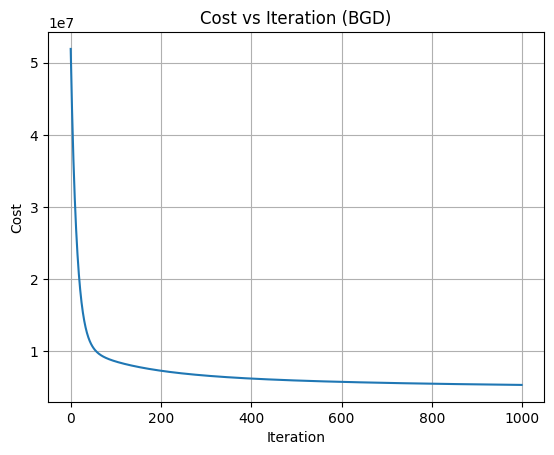

In [38]:
plt.plot(range(epochs), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.title('Cost vs Iteration (BGD)')
plt.grid(True)
plt.show()

In [39]:
y_pred = X_scaled @ theta


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = y_pred.flatten()

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

In [41]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 2140.7104242368673
Mean Squared Error (MSE): 10597280.166061161


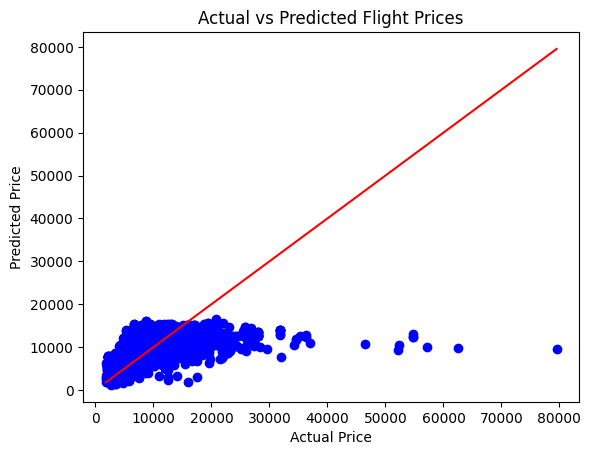

In [43]:
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Flight Prices')
plt.show()


In [47]:
# New data for prediction (use realistic example values)
new_data = {
    'Journey_day': [10],
    'Journey_month': [5],
    'Dep_hour': [10],
    'Dep_minute': [30],
    'Arrival_hour': [12],
    'Arrival_minute': [45],
    'Duration_hours': [2],
    'Duration_mins': [15],
    'Airline_Air India': [1],
    'Airline_Indigo': [0],
    'Airline_SpiceJet': [0],
    'Source_Chennai': [0],
    'Source_Delhi': [1],
    'Source_Kolkata': [0],
    'Destination_Bangalore': [0],
    'Destination_Hyderabad': [0],
    'Destination_Kolkata': [1],
    'Total_Stops_1': [1],
    'Total_Stops_2': [0],
    'Total_Stops_3': [0],
}

new_df = pd.DataFrame(new_data)


In [48]:
new_data = pd.get_dummies(new_df)
new_data = new_data.reindex(columns=X.columns, fill_value=0)  # Fill missing columns with 0


In [49]:
new_df_scaled = scaler.transform(new_data)

In [50]:
new_df_scaled = np.hstack([np.ones((new_df_scaled.shape[0], 1)), new_df_scaled])


In [51]:
custom_prediction = new_df_scaled @ theta
